In [53]:

# Assumption 1: The dependent variable (Mischief) is a continuous level


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Participant': list(range(1, 25)),
    'Cloak': [0] * 12 + [1] * 12,
    'Mischief': [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5, 
                 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]
}

df = pd.DataFrame(data)

df.dtypes


Participant    int64
Cloak          int64
Mischief       int64
dtype: object

In [51]:
# Assumption 2: The independent variable consists of two categorical independent grouops



print(df['Cloak'].unique())


[0 1]


In [52]:
# Assumption 3: Each participant is present to only one group



duplicates = df[df.duplicated(subset='Participant', keep=False)]
if not duplicates.empty:
    print("Duplicate Participants found:")
    print(duplicates)
else:
    print("No duplicate participants. Each participant is in only one group.")




No duplicate participants. Each participant is in only one group.


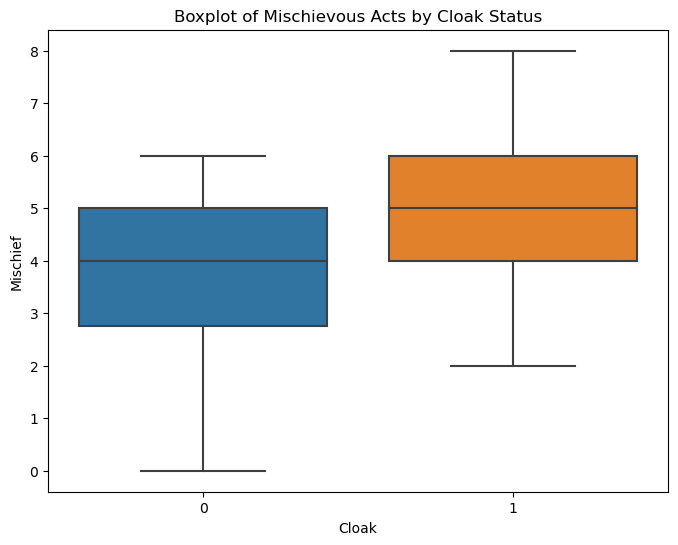

In [13]:
# Assumption 4: no significant outliers in the two groups of independent

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cloak', y='Mischief', data=df)
plt.title('Boxplot of Mischievous Acts by Cloak Status')
plt.show()


In [14]:
# Assumption : Test for Normality


from scipy.stats import shapiro

cloak_group = df[df['Cloak'] == 1]['Mischief']
no_cloak_group = df[df['Cloak'] == 0]['Mischief']

shapiro_cloak = shapiro(cloak_group)
shapiro_no_cloak = shapiro(no_cloak_group)

print(f"Shapiro-Wilk test for cloak group: p-value = {shapiro_cloak.pvalue:.4f}")
print(f"Shapiro-Wilk test for no-cloak group: p-value = {shapiro_no_cloak.pvalue:.4f}")

# Normal distribution


Shapiro-Wilk test for cloak group: p-value = 0.9362
Shapiro-Wilk test for no-cloak group: p-value = 0.2314


In [49]:
# Independet T-Test

from scipy.stats import ttest_ind


t_stat, p_value = ttest_ind(cloak_group, no_cloak_group)

print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")


t-statistic: 1.7135, p-value: 0.1007


## Conclusion

In summary, while there might be some indication of a difference in behavior due to the invisibility cloak, the lack of statistical significance (p > 0.05) means we cannot confidently conclude that the cloak affects mischievous behavior. More data or a different experimental design might be needed to draw more definitive conclusions.